In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 8 of Set 25 | chokurdakh
Processing Record 9 of Set 25 | albany
Processing Record 10 of Set 25 | rikitea
Processing Record 11 of Set 25 | den helder
Processing Record 12 of Set 25 | charlestown
Processing Record 13 of Set 25 | hermanus
Processing Record 14 of Set 25 | margate
Processing Record 15 of Set 25 | bredasdorp
Processing Record 16 of Set 25 | iqaluit
Processing Record 17 of Set 25 | faanui
Processing Record 18 of Set 25 | souillac
Processing Record 19 of Set 25 | kabompo
Processing Record 20 of Set 25 | castro
Processing Record 21 of Set 25 | ushuaia
Processing Record 22 of Set 25 | hasaki
Processing Record 23 of Set 25 | puerto ayora
Processing Record 24 of Set 25 | busselton
Processing Record 25 of Set 25 | rengali
Processing Record 26 of Set 25 | bara
Processing Record 27 of Set 25 | sioux lookout
Processing Record 28 of Set 25 | mataura
Processing Record 29 of Set 25 | lebu
Processing Record 30 of Set 25 | butaritari
Processing Record 31 of Set 25 | peto


Processing Record 36 of Set 28 | asfi
Processing Record 37 of Set 28 | nanortalik
Processing Record 38 of Set 28 | umm kaddadah
Processing Record 39 of Set 28 | iaciara
Processing Record 40 of Set 28 | tuktoyaktuk
Processing Record 41 of Set 28 | palmital
Processing Record 42 of Set 28 | batticaloa
Processing Record 43 of Set 28 | asyut
Processing Record 44 of Set 28 | north bend
Processing Record 45 of Set 28 | saint-raymond
Processing Record 46 of Set 28 | kazalinsk
City not found. Skipping...
Processing Record 47 of Set 28 | kahului
Processing Record 48 of Set 28 | upernavik
Processing Record 49 of Set 28 | norman wells
Processing Record 50 of Set 28 | poum
Processing Record 1 of Set 29 | podporozhye
Processing Record 2 of Set 29 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 29 | tomatlan
Processing Record 4 of Set 29 | nome
Processing Record 5 of Set 29 | zhigansk
Processing Record 6 of Set 29 | carnarvon
Processing Record 7 of Set 29 | pitimbu
Processing R

Processing Record 19 of Set 32 | hovd
Processing Record 20 of Set 32 | qui nhon
Processing Record 21 of Set 32 | aripuana
Processing Record 22 of Set 32 | ayan
Processing Record 23 of Set 32 | naryan-mar
Processing Record 24 of Set 32 | uvat
Processing Record 25 of Set 32 | asau
Processing Record 26 of Set 32 | kieta
Processing Record 27 of Set 32 | kaeo
Processing Record 28 of Set 32 | constitucion
Processing Record 29 of Set 32 | baherden
Processing Record 30 of Set 32 | geraldton
Processing Record 31 of Set 32 | sobolevo
Processing Record 32 of Set 32 | san ramon
Processing Record 33 of Set 32 | altamira
Processing Record 34 of Set 32 | groningen
Processing Record 35 of Set 32 | vanimo
Processing Record 36 of Set 32 | dalvik
Processing Record 37 of Set 32 | paamiut
Processing Record 38 of Set 32 | kyshtovka
Processing Record 39 of Set 32 | bulgan
Processing Record 40 of Set 32 | banos
Processing Record 41 of Set 32 | coos bay
Processing Record 42 of Set 32 | agadez
Processing Record

Processing Record 7 of Set 36 | toliary
City not found. Skipping...
Processing Record 8 of Set 36 | smidovich
Processing Record 9 of Set 36 | tonj
Processing Record 10 of Set 36 | baykit
Processing Record 11 of Set 36 | moerai
Processing Record 12 of Set 36 | ronne
Processing Record 13 of Set 36 | axim
Processing Record 14 of Set 36 | allanmyo
City not found. Skipping...
Processing Record 15 of Set 36 | hamilton
Processing Record 16 of Set 36 | payo
Processing Record 17 of Set 36 | dixon
Processing Record 18 of Set 36 | gornopravdinsk
Processing Record 19 of Set 36 | naze
Processing Record 20 of Set 36 | pelym
Processing Record 21 of Set 36 | vidim
Processing Record 22 of Set 36 | diffa
Processing Record 23 of Set 36 | cheremukhovo
Processing Record 24 of Set 36 | gamba
Processing Record 25 of Set 36 | zmievka
City not found. Skipping...
Processing Record 26 of Set 36 | cap malheureux
Processing Record 27 of Set 36 | mount gambier
Processing Record 28 of Set 36 | numan
Processing Recor

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,2.44,95,100,5.70,RU,2020-11-07 21:04:08
1,Albany,42.60,-73.97,73.40,43,75,5.82,US,2020-11-07 21:00:07
2,Rikitea,-23.12,-134.97,71.46,72,42,16.82,PF,2020-11-07 21:04:08
3,Den Helder,52.96,4.76,48.20,87,20,6.93,NL,2020-11-07 21:04:08
4,Charlestown,-32.95,151.67,62.01,77,69,6.87,AU,2020-11-07 21:04:09
5,Hermanus,-34.42,19.23,64.00,64,0,8.01,ZA,2020-11-07 21:00:20
6,Margate,51.38,1.39,54.00,91,31,1.99,GB,2020-11-07 21:04:09
7,Bredasdorp,-34.53,20.04,62.60,51,0,14.99,ZA,2020-11-07 21:04:09
8,Iqaluit,63.75,-68.51,10.40,78,75,5.82,CA,2020-11-07 21:00:13
9,Faanui,-16.48,-151.75,78.93,79,70,12.01,PF,2020-11-07 21:04:09


In [18]:
#creating a new column order for dataframe
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [19]:
#updated column order for city dataframe
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2020-11-07 21:04:08,70.63,147.92,2.44,95,100,5.70
1,Albany,US,2020-11-07 21:00:07,42.60,-73.97,73.40,43,75,5.82
2,Rikitea,PF,2020-11-07 21:04:08,-23.12,-134.97,71.46,72,42,16.82
3,Den Helder,NL,2020-11-07 21:04:08,52.96,4.76,48.20,87,20,6.93
4,Charlestown,AU,2020-11-07 21:04:09,-32.95,151.67,62.01,77,69,6.87
5,Hermanus,ZA,2020-11-07 21:00:20,-34.42,19.23,64.00,64,0,8.01
6,Margate,GB,2020-11-07 21:04:09,51.38,1.39,54.00,91,31,1.99
7,Bredasdorp,ZA,2020-11-07 21:04:09,-34.53,20.04,62.60,51,0,14.99
8,Iqaluit,CA,2020-11-07 21:00:13,63.75,-68.51,10.40,78,75,5.82
9,Faanui,PF,2020-11-07 21:04:09,-16.48,-151.75,78.93,79,70,12.01


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/07/20'

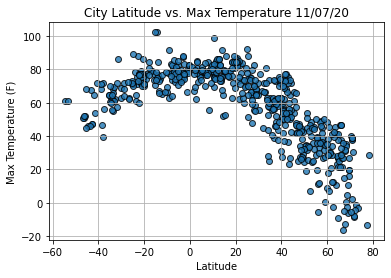

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

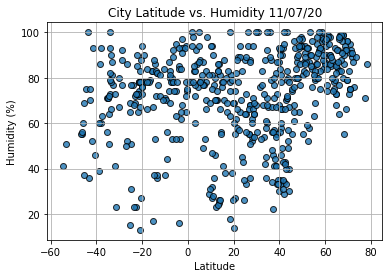

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

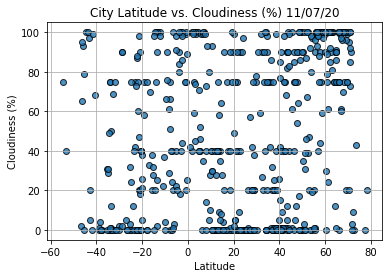

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

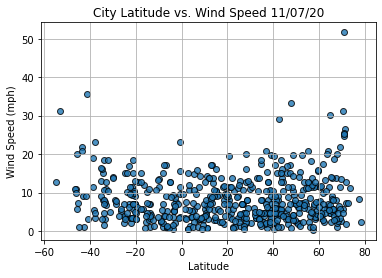

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()